In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data= pd.read_csv("Train.csv")
test_data= pd.read_csv("Test.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.shape

(8523, 12)

In [6]:
test_data.shape

(5681, 11)

In [7]:
train_data_colnames=train_data.columns
train_data_colnames

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
test_data_colnames= test_data.columns
test_data_colnames

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

"Intem weight" and "outlet size" has more numeber of null values 
we have to handel this null values

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [14]:
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
test_data.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [16]:
categorical_feature= ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [17]:
Target_feature= ['Item_Outlet_Sales']

In [18]:
continuous_featute=['Item_Weight','Item_Visibility','Item_MRP']

Now we distributed items in categorical and continuous features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

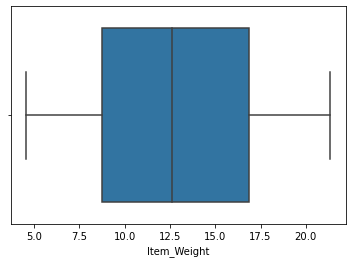

In [19]:
sns.boxplot(train_data["Item_Weight"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

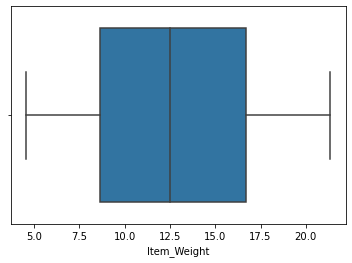

In [20]:
sns.boxplot(test_data['Item_Weight'])

No Ouliers are present in dataset hence we can use mean to replace null values

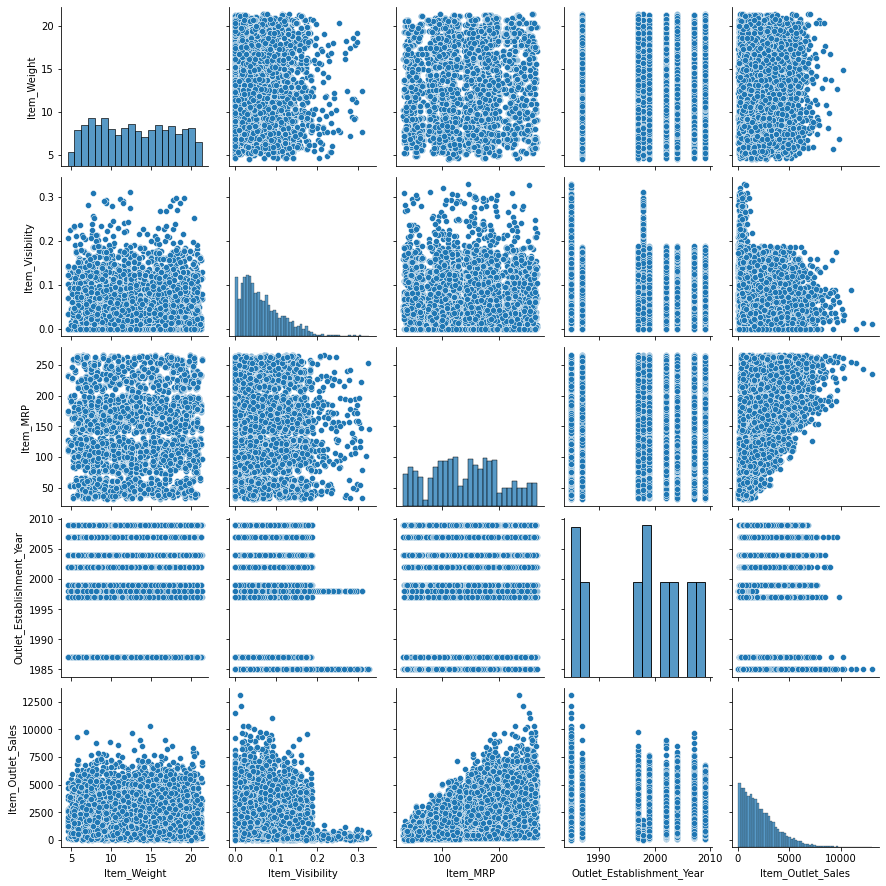

In [21]:
sns.pairplot(train_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

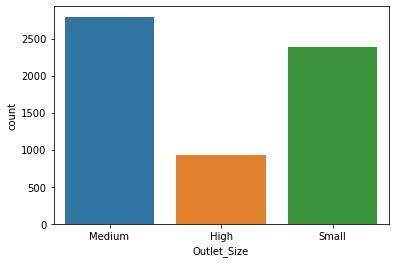

In [22]:
sns.countplot('Outlet_Size', data=train_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

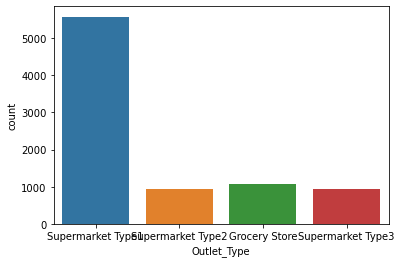

In [23]:
sns.countplot("Outlet_Type", data=train_data)

In [24]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

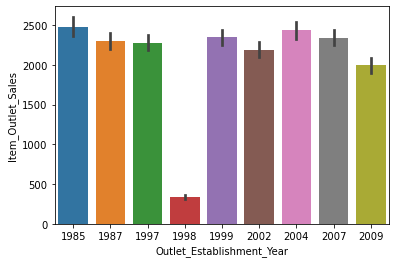

In [25]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data)

Obsevation: Older oulets are having maximum sales thn newer outlets

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

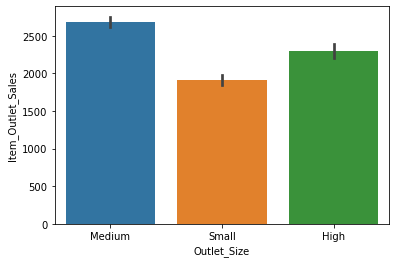

In [26]:
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', order=train_data['Outlet_Size'].value_counts().index,data=train_data)

larg outlet sizes are having maximum sales than smaller outlet size

In [27]:
cat_fea=train_data[categorical_feature]
cat_fea.drop('Outlet_Establishment_Year', axis=1, inplace=True)
cat_fea

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [28]:
from sklearn.compose import make_column_transformer

In [29]:
categorical_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

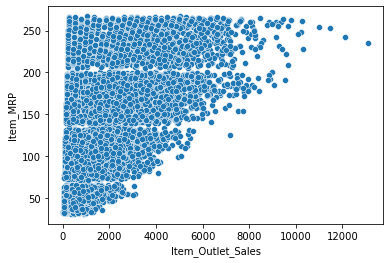

In [30]:
sns.scatterplot(x= train_data["Item_Outlet_Sales"], y=train_data["Item_MRP"])

In [31]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
train_data["No_of_Item_Sold"]= train_data["Item_Outlet_Sales"]/train_data["Item_MRP"]

In [33]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No_of_Item_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

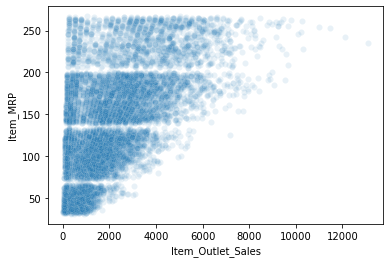

In [34]:
sns.scatterplot(x= train_data["Item_Outlet_Sales"], y=train_data["Item_MRP"], alpha=0.1)

Here we can obser that items which are higher cost has lesser no of sales however they are generating more sales to the store

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

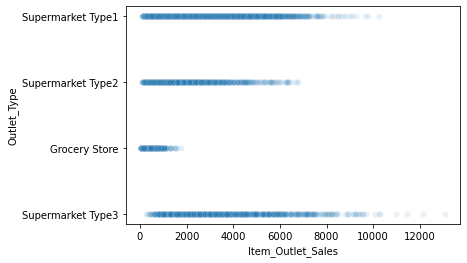

In [35]:
sns.scatterplot(x= train_data["Item_Outlet_Sales"], y=train_data["Outlet_Type"], alpha=0.1)

Here we can observe that small outlets are having lesser sales that big outlets

In [36]:
coor_metrix= train_data.corr()

In [37]:
coor_metrix


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,No_of_Item_Sold
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123,-0.011822
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625,-0.161024
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574,0.011144
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135,-0.074536
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000,0.759315
No_of_Item_Sold,-0.011822,-0.161024,0.011144,-0.074536,0.759315,1.000000


In [38]:
coor_metrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
No_of_Item_Sold              0.759315
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [39]:
#Here we can observe that Noumber of item sold has maximum correlation with the output variables

In [40]:
training_target_column= train_data["Item_Outlet_Sales"]

In [41]:
training_target_column.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [42]:
training_labels= train_data.drop("Item_Outlet_Sales", axis=1)

In [43]:
training_labels.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_of_Item_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,14.809346
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,4.021967
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,18.467868


## Data Cleaning


#### After Proforming  EDA Operaion we will start our data cleaning with Null values

In [44]:
training_labels.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
No_of_Item_Sold                 0
dtype: int64

In [45]:
#training_labels= training_labels.drop("Item_Identifier", axis=1)

Two columns has null values, And as we have cheked no outiers are present in the data set we can replace null values with mean 

In [46]:
from sklearn.impute import SimpleImputer

it is returning us numpy array but can save it in pandas dataframe back

In [47]:
train_data['Item_Fat_Content'].replace({"Low Fat":"low fat", "LF":"low fat", 'reg': 'Regular'}, inplace=True)

In [48]:
train_data["Item_Fat_Content"].unique()

array(['low fat', 'Regular'], dtype=object)

In [49]:
from sklearn.preprocessing import OneHotEncoder
#ohe= OneHotEncoder()

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
from sklearn.pipeline import Pipeline

numerical_pipeline= Pipeline(
[
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
]
)

In [52]:
from sklearn.compose import ColumnTransformer
num_attr= continuous_featute
cat_attr= categorical_feature

full_pipeline= ColumnTransformer(
[
    ('Num', numerical_pipeline, num_attr),
    ('cat', OneHotEncoder(), cat_attr )
]
)



In [53]:
training_labels.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_of_Item_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,9.186454


In [54]:
training_target_column.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [55]:
sd= StandardScaler()

In [56]:
Trained_data= full_pipeline.fit_transform(training_labels)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lin_regressor= LinearRegression()

In [59]:
lin_regressor.fit(Trained_data, training_target_column)

LinearRegression()

In [60]:
some_data= training_labels.iloc[:5]
some_targets= training_target_column.iloc[:5]
some_data_prepared= full_pipeline.transform(some_data)
print("predictions", lin_regressor.predict(some_data_prepared))

predictions [4019.33514971  567.206044   2371.84665301 1078.20421239  910.42832549]


In [61]:
print(some_targets)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64


In [62]:
from sklearn.metrics import mean_squared_error
sales_prediction= lin_regressor.predict(Trained_data)
lin_mse= mean_squared_error(training_target_column, sales_prediction)
line_rsme= np.sqrt(lin_mse)
line_rsme

1126.9513596678335

In [63]:
#Root mean Square in the linear model in 1126 which not very good and may be a result of underfitting of our model

In [64]:
#We can try by trining our model with some more complex algorithm to check the accuracy 

In [65]:
from sklearn.tree import DecisionTreeRegressor
tree_gresssor= DecisionTreeRegressor()
tree_gresssor.fit(X=Trained_data, y=training_target_column)

DecisionTreeRegressor()

In [66]:
sales_prediction_tree= tree_gresssor.predict(Trained_data)
lin_mse= mean_squared_error(training_target_column, sales_prediction_tree)
line_rsme= np.sqrt(lin_mse)
line_rsme

0.0

In [67]:
some_data= training_labels.iloc[:5]
some_targets= training_target_column.iloc[:5]
some_data_prepared= full_pipeline.transform(some_data)
print("predictions", tree_gresssor.predict(some_data_prepared))

predictions [3735.138   443.4228 2097.27    732.38    994.7052]


In [68]:
print(some_targets)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64


In [69]:
# With this algorithm model is predicting 0 error which is also a not good case.
# We will try to evaluate our model with grid search CV

In [70]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_gresssor, Trained_data, training_target_column, scoring="neg_mean_squared_error", cv=10)
tree_rsme_score= np.sqrt(-scores)


In [71]:
def Display_Results(scores):
    print(f"scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

In [72]:
Display_Results(tree_rsme_score)

scores: [1527.39908229 1478.44323046 1570.10287553 1514.46943955 1613.48587629
 1539.13954825 1529.11988022 1605.28326593 1485.06411034 1546.04111312]
Mean: 1540.854842196673
Standard Deviation: 42.81862598557073


In [73]:
scores_lin= cross_val_score(lin_regressor, Trained_data, training_target_column, scoring="neg_mean_squared_error", cv=10)
lin_rsme_score= np.sqrt(-scores_lin)

In [74]:
Display_Results(lin_rsme_score)

scores: [1165.93079971 1140.46732217 1124.63436668 1117.91884901 1121.51065989
 1110.25261376 1116.37507628 1140.56418033 1139.89860251 1145.48340831]
Mean: 1132.303587865305
Standard Deviation: 16.184106824155236


    Here we can observe that after cross validating datasets DesicionTreeRegressor is performing worse than linear regressor

Now we can try RandomForestRegressor to check the accuracy

In [75]:
from sklearn.ensemble import RandomForestRegressor
random_regressor= RandomForestRegressor()

In [76]:
random_regressor.fit(Trained_data, training_target_column)

RandomForestRegressor()

In [77]:
random_score= cross_val_score(random_regressor, Trained_data, training_target_column, scoring="neg_mean_squared_error", cv=10)
rondom_rsme= np.sqrt(-random_score)

In [78]:
Display_Results(rondom_rsme)

scores: [1158.48568872 1127.96010159 1155.68811119 1097.23412525 1155.4524093
 1103.22758835 1111.69956673 1137.43492348 1120.35751392 1152.41652907]
Mean: 1131.995655758724
Standard Deviation: 22.044274214126993


In [79]:
#Model Accuracy by linear regression model and random forest model is almost same.

Now we will try evaluating some othe models with different parameter. 

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
grid_random_regressor= RandomForestRegressor()

In [82]:
Grid_Param= [
    {'n_estimators': [10,30,50,80], 'max_features': [2,5,8]}
]

In [83]:
grid_search= GridSearchCV(grid_random_regressor, Grid_Param, cv=5, scoring="neg_mean_squared_error",return_train_score=True)


In [84]:
grid_search.fit(Trained_data, training_target_column)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 5, 8],
                          'n_estimators': [10, 30, 50, 80]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 80}

Heigest value for n_estimator given to the model was 80 but it is givig 50 as best value it means accuracy is decreasing after 50 n_estimators

In [86]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=80)

In [87]:
results= grid_search.cv_results_

In [88]:
for mean_score, param in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_score), param)

1246.9479781453608 {'max_features': 2, 'n_estimators': 10}
1204.3213986867752 {'max_features': 2, 'n_estimators': 30}
1196.14810010881 {'max_features': 2, 'n_estimators': 50}
1190.174140496668 {'max_features': 2, 'n_estimators': 80}
1194.0954215698564 {'max_features': 5, 'n_estimators': 10}
1172.296661010287 {'max_features': 5, 'n_estimators': 30}
1161.062587809736 {'max_features': 5, 'n_estimators': 50}
1155.1794989939458 {'max_features': 5, 'n_estimators': 80}
1186.027876572351 {'max_features': 8, 'n_estimators': 10}
1149.492717445737 {'max_features': 8, 'n_estimators': 30}
1147.7114032167026 {'max_features': 8, 'n_estimators': 50}
1143.9085323827765 {'max_features': 8, 'n_estimators': 80}


1140 is the best score that we can got.
With this we have fine tuned our model.

In [91]:
feature_importance= grid_search.best_estimator_.feature_importances_
feature_importance

array([0.0855431 , 0.12242395, 0.42810026, 0.00393692, 0.00882411,
       0.00824737, 0.00219039, 0.0022431 , 0.00527511, 0.00359743,
       0.00292619, 0.00523662, 0.00662582, 0.00625369, 0.00814185,
       0.0029016 , 0.00421391, 0.00587414, 0.00418589, 0.00226619,
       0.00234037, 0.00760951, 0.00518688, 0.00351519, 0.01756239,
       0.00139416, 0.00132913, 0.00255226, 0.01799404, 0.03229693,
       0.00114382, 0.00128365, 0.0012164 , 0.00179344, 0.02054492,
       0.00063876, 0.0019266 , 0.02112934, 0.00116063, 0.0014137 ,
       0.00138573, 0.00155726, 0.00161122, 0.00123292, 0.0075402 ,
       0.00259528, 0.00470355, 0.00386782, 0.00300104, 0.0082462 ,
       0.05536107, 0.01397361, 0.00372253, 0.02816181])

In [92]:
categorical_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [93]:
cat_encoder= full_pipeline.named_transformers_["cat"]
cat_one_hot_attr= list(cat_encoder.categories_[1])

In [94]:
cat_one_hot_attr

['Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods']

In [95]:
attributes= continuous_featute+cat_one_hot_attr
sorted(zip(feature_importance, attributes), reverse=True)

[(0.4281002605474463, 'Item_MRP'),
 (0.12242394937077307, 'Item_Visibility'),
 (0.08554309957196567, 'Item_Weight'),
 (0.008824108667602776, 'Breads'),
 (0.008247365530897615, 'Breakfast'),
 (0.0081418534716954, 'Others'),
 (0.006625823600936896, 'Household'),
 (0.006253693012714488, 'Meat'),
 (0.005874136380832924, 'Soft Drinks'),
 (0.005275112090602621, 'Frozen Foods'),
 (0.005236623639681022, 'Health and Hygiene'),
 (0.004213912183669869, 'Snack Foods'),
 (0.004185894764291967, 'Starchy Foods'),
 (0.003936924879260074, 'Baking Goods'),
 (0.00359743139859621, 'Fruits and Vegetables'),
 (0.0029261891838141102, 'Hard Drinks'),
 (0.0029016018824235133, 'Seafood'),
 (0.002243099637785615, 'Dairy'),
 (0.002190394567432857, 'Canned')]

With help of this methon we can decide which variable having less importance and accordingly we can take decision to remove some features.

Also we can create some new columns and check whether it is helping in increasing the model accuracy.